# Experiment : Network growth

## Run the samples

In [1]:
# Script for generate  experiments
# Imports
from clases.red_rddas_model import RedRddasModel
import ray

import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Ray Configurations
runtime_env = {"working_dir": "/home/carlos/Documents/RESEARCH/SynEstRDDA", "pip": ["requests", "pendulum==2.1.2"]}
ray.init(address='ray://172.17.163.244:10001', runtime_env=runtime_env , log_to_driver=False)



/home/carlos/.local/lib/python3.8/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(
2022-06-28 12:41:35,310	INFO packaging.py:414 -- Creating a file package for local directory '/home/carlos/Documents/RESEARCH/SynEstRDDA'.
2022-06-28 12:41:35,528	INFO packaging.py:258 -- Pushing file package 'gcs://_ray_pkg_5e44b002e0f9357b.zip' (19.76MiB) to Ray cluster...
2022-06-28 12:44:26,788	INFO packaging.py:267 -- Successfully pushed file package 'gcs://_ray_pkg_5e44b002e0f9357b.zip'.


ClientContext(dashboard_url='', python_version='3.8.10', ray_version='1.13.0', ray_commit='e4ce38d001dbbe09cd21c497fedd03d692b2be3e', protocol_version='2022-03-16', _num_clients=1, _context_to_restore=<ray.util.client._ClientContext object at 0x7fdf081f5040>)

In [3]:
# Experiment for RDD variation
n_experiments = 10
l_experiments = []
for cont_experiment in range(1,n_experiments+1):
    print("============================")
    print("Experiment:", cont_experiment)
    print("============================")

    # Variable Parameters
    n_rddas_min = 3
    n_rddas_max = 10

    # Fixed Parameters
    n_of_variables_rdda = 5
    n_of_signals_rdda = 2
    n_exit_variables = 2
    n_clauses_function = 2
    type_network = "ALEATORY"
    # this name has to be unique
    unique_path = "21_01_2022"

    # List of Result for the Experiments
    l_res_experiment = []

    v_n_network = 1
    for n_of_rdds in range(n_rddas_min, n_rddas_max + 1):
        print("Number of Network:", v_n_network)
        print("-------------------------------")

        path = "files/" + unique_path + "_" + str(n_of_rdds) + "_" + str(n_of_variables_rdda) + "_" + str(n_of_signals_rdda) \
               + "_" + str(n_exit_variables) + "_" + str(n_clauses_function)

        # generate the RDDAs of the Network of RDDAs
        print("generating the Network of RDDAs ...")
        oRedRddasModel = RedRddasModel(n_of_rdds, n_of_variables_rdda, n_of_signals_rdda, n_exit_variables,
                                       n_clauses_function)

        # Generate the RDDs
        print("generating the rdds ...")
        oRedRddasModel.generate_rddas(type_network=type_network)

        # # Save the Network of RDDAs in a Pickle file
        # RedRddasModel.save_file_pickle(oRedRddasModel, path)
        # path += ".pickle"
        #
        # print("=======================================================")
        # print("The Network of RDDAs is saved in: ", path)

        # Show the Network of RDDAs
        # oRedRddasModel.show()

        # Calculate the Attractors by RDDA and by Signal
        v_begin_0 = time.time()
        result = RedRddasModel.find_attractors_rddas_ray.remote(oRedRddasModel)
        oRedRddasModel = ray.get(result)
        v_end_0 = time.time()
        v_time_0 = v_end_0 - v_begin_0

        # Calculate the Attractors by RDDA and by Signal
        v_begin_1 = time.time()
        result = RedRddasModel.calculation_compatible_pairs.remote(oRedRddasModel)
        oRedRddasModel = ray.get(result)
        v_end_1 = time.time()
        v_time_1 = v_end_1 - v_begin_1

        # # Calculate the Attractors by RDDA and by Signal with iterative Method
        # v_begin_1 = time.time()
        # # result = RedRddasModel.assembly_attractor_fields_iterative.remote(oRedRddasModel)
        # # oRedRddasModel = ray.get(result)
        # v_end_1 = time.time()
        # v_time_1 = v_end_1 - v_begin_1

        # Calculate the Attractors by RDDA and by Signal with optimized Method
        v_begin_2 = time.time()
        result = RedRddasModel.assembly_attractor_fields_optimized.remote(oRedRddasModel)
        oRedRddasModel = ray.get(result)
        v_end_2 = time.time()
        v_time_2 = v_end_2 - v_begin_2

        # Save the results for the experiment , numeric and time indicators
        res_dict = {
                    "n_network": v_n_network,
                    "n_rdds": n_of_rdds,
                    "n_rdda_attractors": len(oRedRddasModel.d_global_rdda_attractor.items()),
                    "t_find_attractors_method": v_time_0,
                    "n_pair_attractors": len(oRedRddasModel.list_attractors_pairs),
                    "t_comp_paris_method": v_time_1,
                    "n_attractor_fields": len(oRedRddasModel.attractor_fields),
                    "t_optimized_method": v_time_2
                    }
        l_res_experiment.append(res_dict)
        v_n_network = v_n_network + 1

    # Add the sample data to pandas dataframe
    df = pd.DataFrame.from_dict(l_res_experiment)
    l_experiments.append(df)
print("END EXPERIMENT")

Experiment: 1
Number of Network: 1
-------------------------------
generating the Network of RDDAs ...
generating the rdds ...
Generating the True Table
A ∨ B
{'13': 'A', '12': 'B'}
{'A': True, 'B': True}
A ∨ B
{'13': 'A', '12': 'B'}
{'A': True, 'B': False}
A ∨ B
{'13': 'A', '12': 'B'}
{'A': False, 'B': True}
A ∨ B
{'13': 'A', '12': 'B'}
{'A': False, 'B': False}
Generating the True Table
A ∨ B
{'7': 'A', '9': 'B'}
{'A': True, 'B': True}
A ∨ B
{'7': 'A', '9': 'B'}
{'A': True, 'B': False}
A ∨ B
{'7': 'A', '9': 'B'}
{'A': False, 'B': True}
A ∨ B
{'7': 'A', '9': 'B'}
{'A': False, 'B': False}
Generating the True Table
A ∨ B
{'11': 'A', '12': 'B'}
{'A': True, 'B': True}
A ∨ B
{'11': 'A', '12': 'B'}
{'A': True, 'B': False}
A ∨ B
{'11': 'A', '12': 'B'}
{'A': False, 'B': True}
A ∨ B
{'11': 'A', '12': 'B'}
{'A': False, 'B': False}
Generating the True Table
A ∨ B
{'4': 'A', '1': 'B'}
{'A': True, 'B': True}
A ∨ B
{'4': 'A', '1': 'B'}
{'A': True, 'B': False}
A ∨ B
{'4': 'A', '1': 'B'}
{'A': False, 

2022-06-28 12:46:48,664	INFO common.py:112 -- Exception in ObjectRef is ignored in destructor. To receive this exception in application code, call a method on the actor reference before its destructor is run.


Number of Network: 7
-------------------------------
generating the Network of RDDAs ...
generating the rdds ...
Generating the True Table
A ∨ B
{'29': 'A', '27': 'B'}
{'A': True, 'B': True}
A ∨ B
{'29': 'A', '27': 'B'}
{'A': True, 'B': False}
A ∨ B
{'29': 'A', '27': 'B'}
{'A': False, 'B': True}
A ∨ B
{'29': 'A', '27': 'B'}
{'A': False, 'B': False}
Generating the True Table
A ∨ B
{'30': 'A', '27': 'B'}
{'A': True, 'B': True}
A ∨ B
{'30': 'A', '27': 'B'}
{'A': True, 'B': False}
A ∨ B
{'30': 'A', '27': 'B'}
{'A': False, 'B': True}
A ∨ B
{'30': 'A', '27': 'B'}
{'A': False, 'B': False}
Generating the True Table
A ∨ B
{'8': 'A', '9': 'B'}
{'A': True, 'B': True}
A ∨ B
{'8': 'A', '9': 'B'}
{'A': True, 'B': False}
A ∨ B
{'8': 'A', '9': 'B'}
{'A': False, 'B': True}
A ∨ B
{'8': 'A', '9': 'B'}
{'A': False, 'B': False}
Generating the True Table
A ∨ B
{'16': 'A', '17': 'B'}
{'A': True, 'B': True}
A ∨ B
{'16': 'A', '17': 'B'}
{'A': True, 'B': False}
A ∨ B
{'16': 'A', '17': 'B'}
{'A': False, 'B': Tru

## Analysing the results

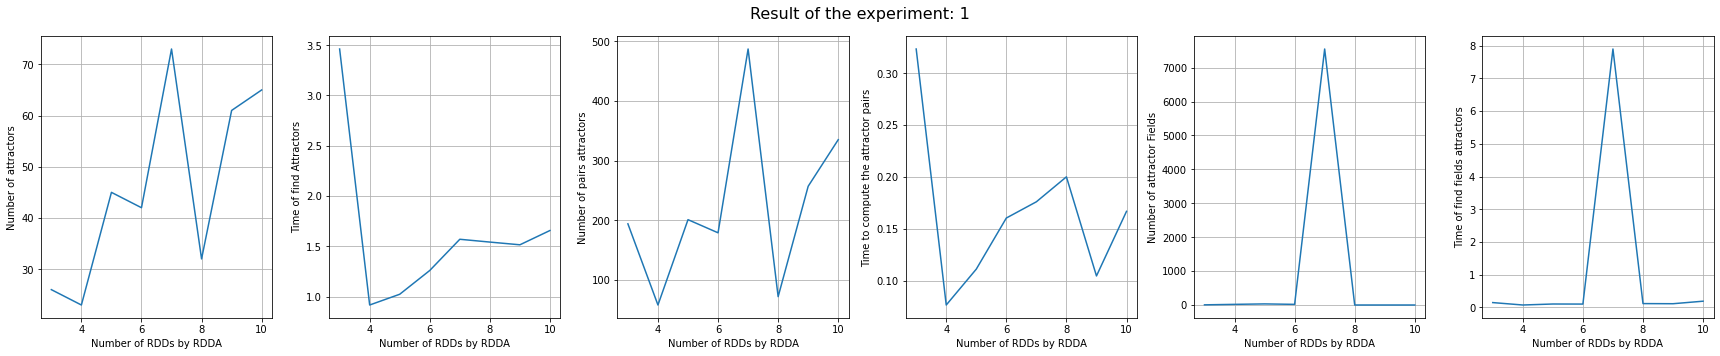

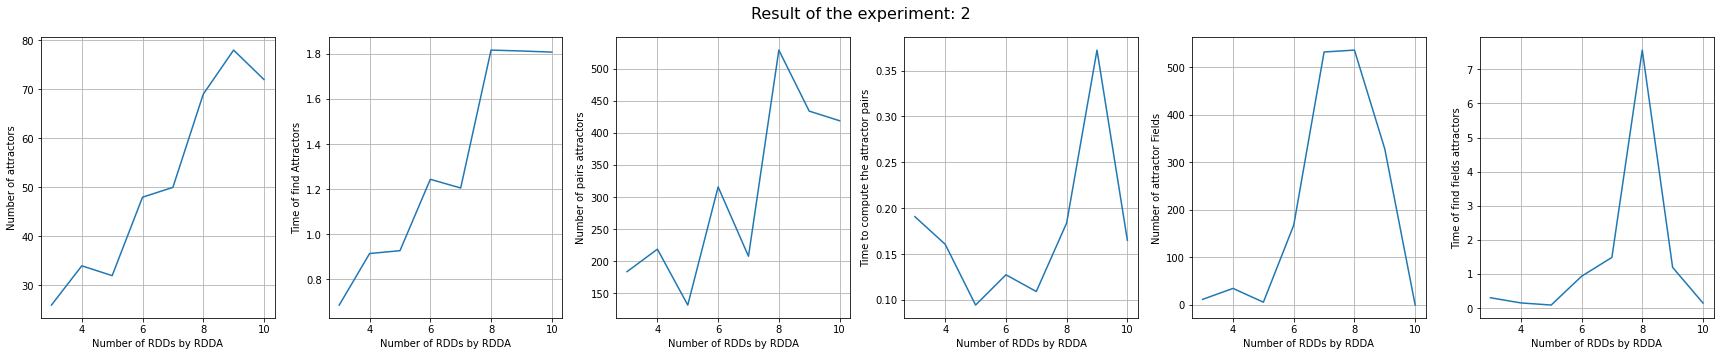

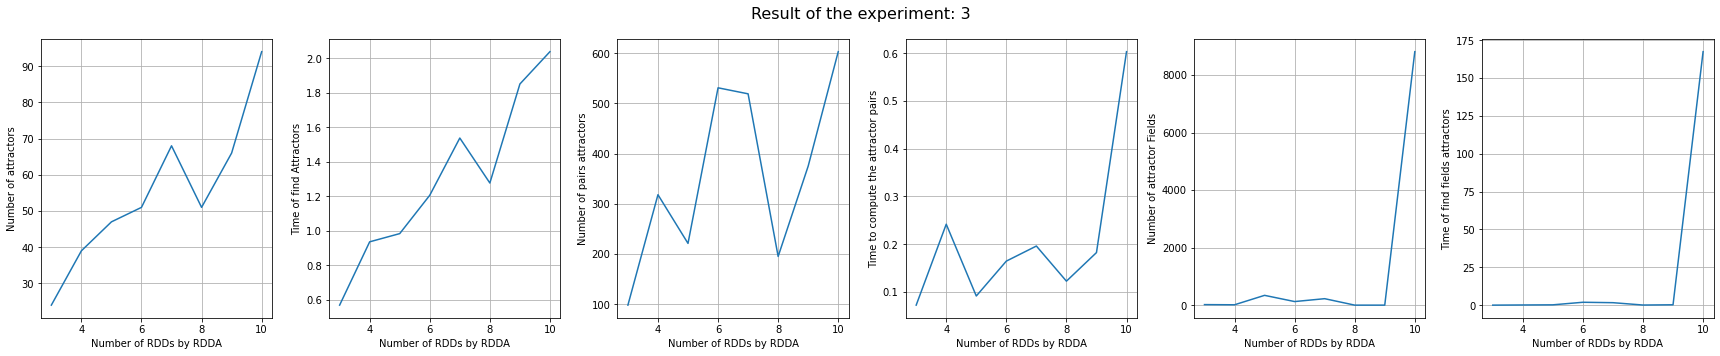

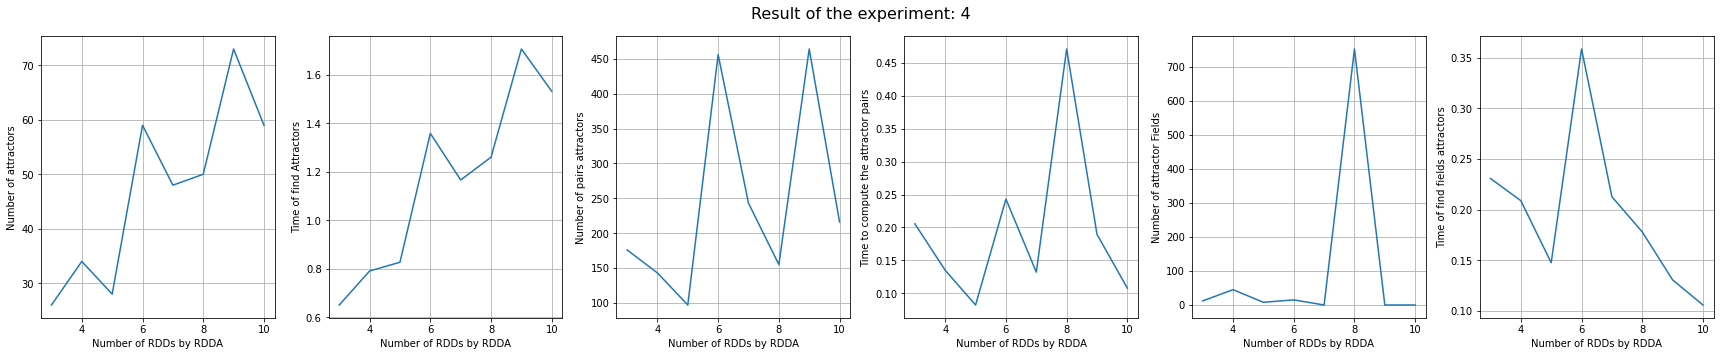

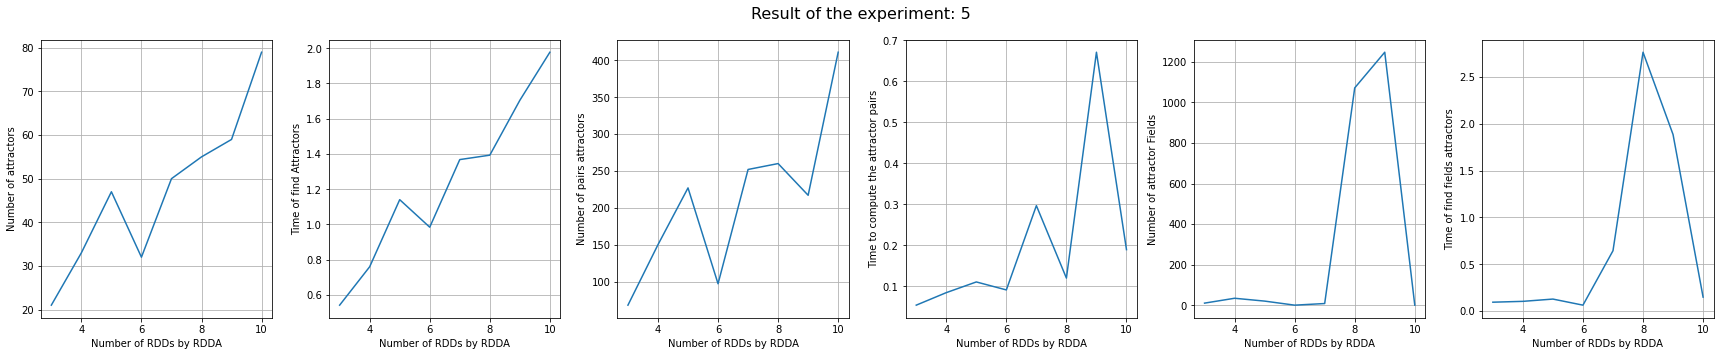

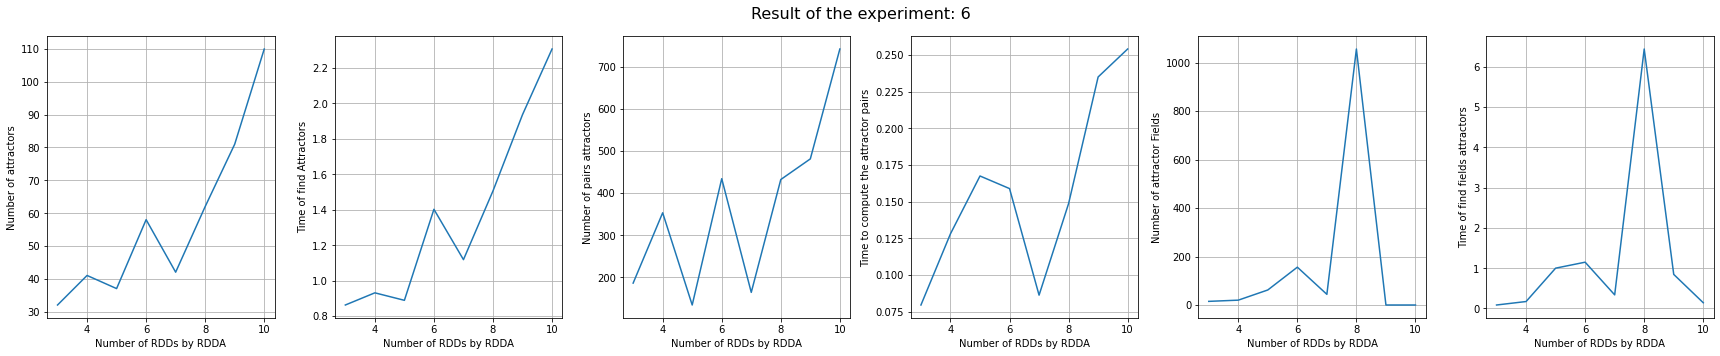

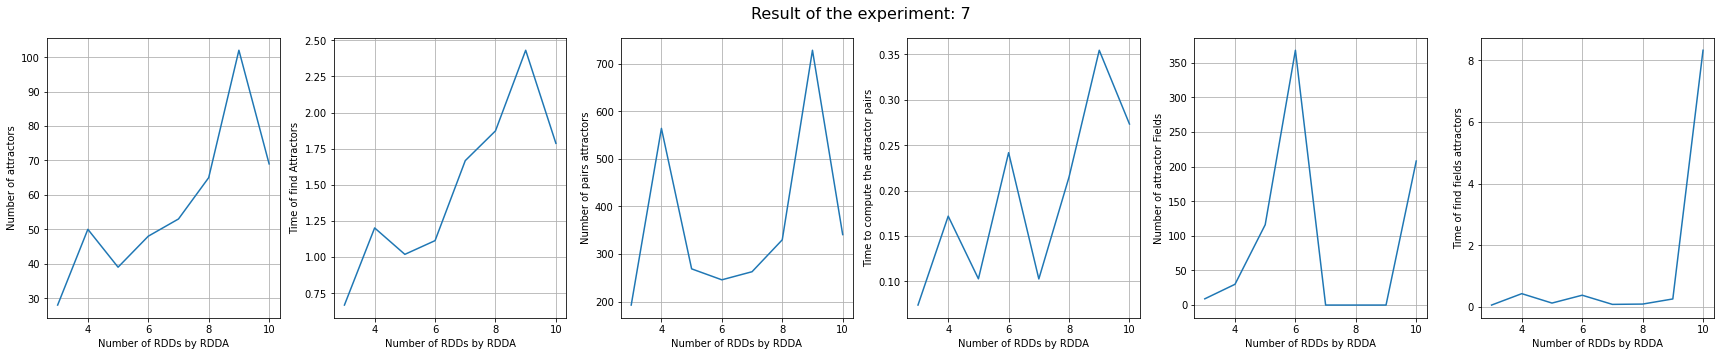

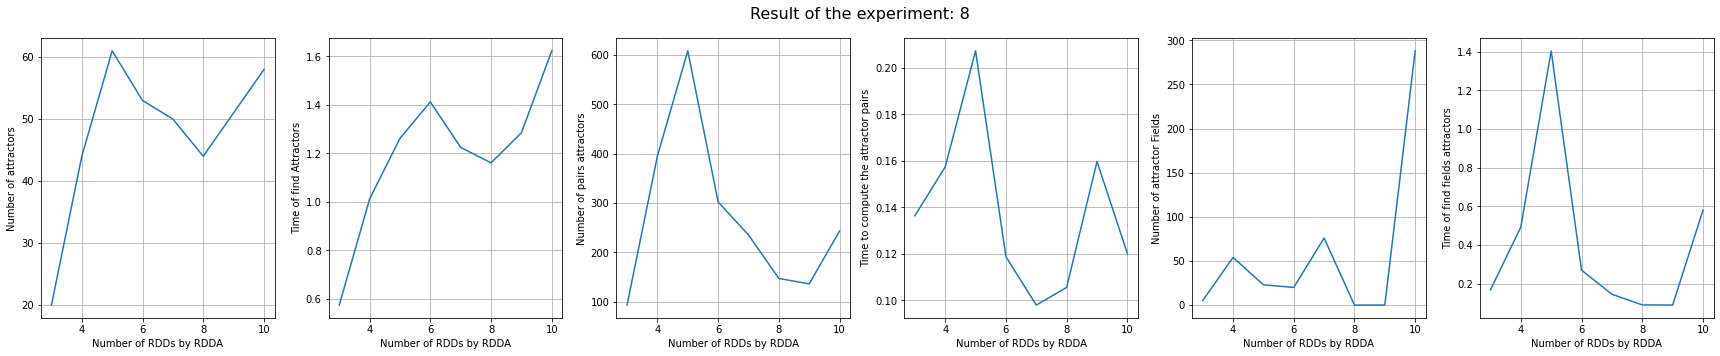

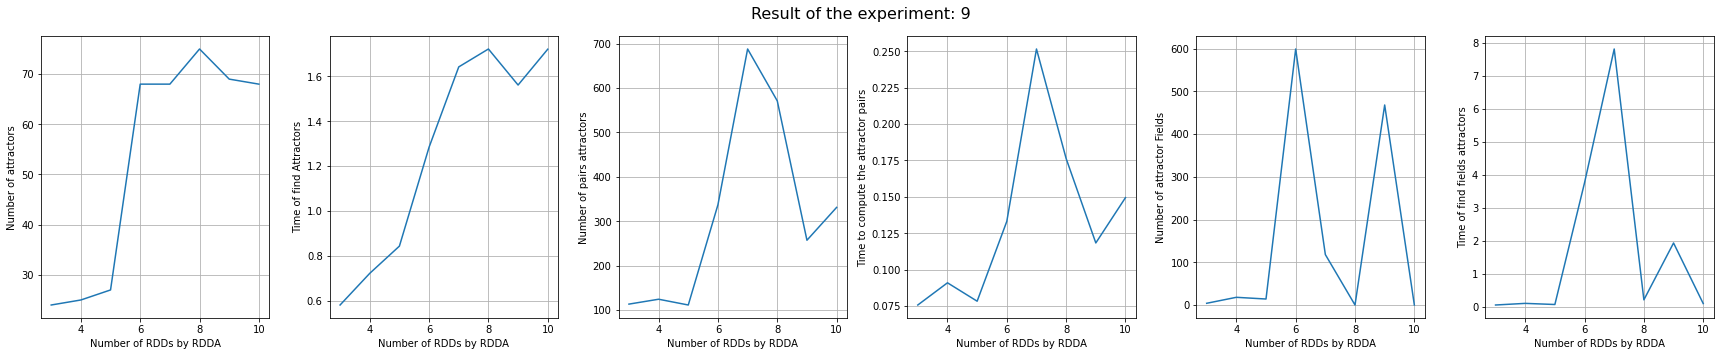

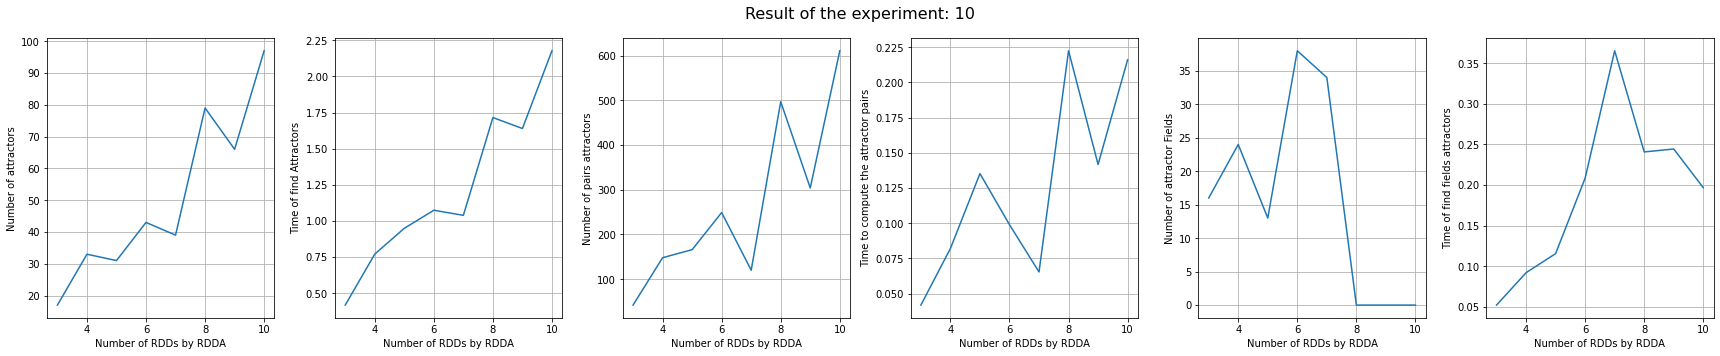

In [4]:
# Show the graphs for every experiment
l_labels_y = ["Number of attractors", "Time of find Attractors", "Number of pairs attractors", "Time to compute the attractor pairs", "Number of attractor Fields", "Time of find fields attractors"]
n_experiment = 1
for df in l_experiments:
    fig_, axs = plt.subplots(1,6,figsize=(24,5))
    cont_label = 0
    for (ax, y) in zip(axs, np.asarray(df.keys())[2:]):
        ax.plot(df['n_rdds'], df[y])
        ax.set_xlabel('Number of RDDs by RDDA')
        ax.set_ylabel(l_labels_y[cont_label])
        ax.grid(True)
        cont_label += 1
    fig_.suptitle('Result of the experiment: ' + str(n_experiment), fontsize=16)
    fig_.tight_layout()
    n_experiment +=1

### Show the Metrics

In [5]:
pd_res = pd.concat(l_experiments, keys=range(1,11))
pd_res.keys()
pd_res

n_network  n_rdds  n_rdda_attractors  t_find_attractors_method  \
1  0          1       3                 26                  3.461589   
   1          2       4                 23                  0.917764   
   2          3       5                 45                  1.024550   
   3          4       6                 42                  1.260906   
   4          5       7                 73                  1.570907   
...         ...     ...                ...                       ...   
10 3          4       6                 43                  1.073939   
   4          5       7                 39                  1.038855   
   5          6       8                 79                  1.715281   
   6          7       9                 66                  1.639527   
   7          8      10                 97                  2.177449   

      n_pair_attractors  t_comp_paris_method  n_attractor_fields  \
1  0                194             0.323233                   5   
   1                 58             0.076628                  19   
   2                201             0.111174                  32   
   3                179             0.160407                  19   
   4                487             0.176050                7548   
...                 ...                  ...                 ...   
10 3                249             0.098918                  38   
   4                120             0.065294                  34   
   5                497             0.222515                   0   
   6                304             0.141709                   0   
   7                611             0.216123                   0   

      t_optimized_method  
1  0            0.149198  
   1            0.075378  
   2            0.105736  
   3            0.103715  
   4            7.897288  
...                  ...  
10 3            0.208561  
   4            0.365302  
   5            0.240776  
   6            0.244383  
   7            0.196786  

[80 rows x 8 columns]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fded9486610>,
 'caps': [<matplotlib.lines.Line2D at 0x7fded9486a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fded9486340>],
 'medians': [<matplotlib.lines.Line2D at 0x7fded948f070>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fded948f340>],
 'means': []}

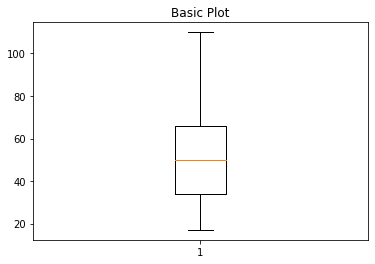

In [6]:
# Analysing the number of attractors
data = pd_res['n_rdda_attractors']
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(data)